### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from MALDI_class import MALDI, rawMALDI, binnedMALDI, selectedMALDI

### Load example data

In [2]:
path = '/data/datadata/40_MALDI/MALDI/brain201re-49/V1/RAW-Data/brain201re-49_V1_pos.imzML'
resolution = 1e-5
M = MALDI(path, resolution = resolution)

/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession MS:1000563 found with incorrect name "Thermo RAW file". Updating name to "Thermo RAW format".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession MS:1000590 found with incorrect name "contact organization". Updating name to "contact affiliation".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
/home/sj/.local/lib/python3.10/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updati

### Print Metadata

In [3]:
M.print_metadata()

{'file_description': {'type': 'fileContent',
                      'MS1 spectrum': True,
                      'profile spectrum': True,
                      'universally unique identifier': '{25E35984-2347-4920-A79F-DE910FCF0A22}',
                      'ibd SHA-1': 'F44F56ACA54C1C4509A79B52C847BBF8713C81E2',
                      'processed': True,
                      'source_files': {'sf1': {'type': 'sourceFile',
                                               'id': 'sf1',
                                               'name': '20210614_JW_#2_Schnitt49_V1.raw',
                                               'location': 'C:\\Xcalibur\\data\\2021\\2021_Jan\\20210614_JW_#2_Schnitt49_V1\\',
                                               'Thermo RAW format': True,
                                               'Thermo nativeID format': True,
                                               'SHA-1': ''}},
                      'contacts': [{'type': 'contact',
                             

### Load raw data

In [4]:
M_raw = rawMALDI(M.filename, M.resolution, M.Range, M.n_processes)

### show TIC, single mass, single mass after normalization and center of mass images

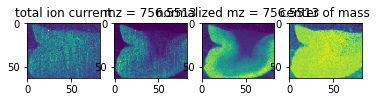

In [5]:
fig, axs = plt.subplots(1,4)
img = M_raw.get_2D(M_raw.sumpicture())
axs.flat[0].imshow(img)
axs.flat[0].set_title('total ion current')
mz = 756.5513
img = M_raw.get_2D(M_raw.massvec(mz))
axs.flat[1].imshow(img)
axs.flat[1].set_title('mz = 756.5513')
M_raw.normalize()
img = M_raw.get_2D(M_raw.massvec(mz))
axs.flat[2].imshow(img)
axs.flat[2].set_title('normalized mz = 756.5513')
img = M_raw.get_2D(M_raw.center_of_mass())
axs.flat[3].imshow(img)
axs.flat[3].set_title('center of mass')
plt.show()

### Bin data

In [6]:
M_binned = binnedMALDI(M.filename, M.resolution, M.Range, M.n_processes, data_spectrum = M_raw.data_spectrum)

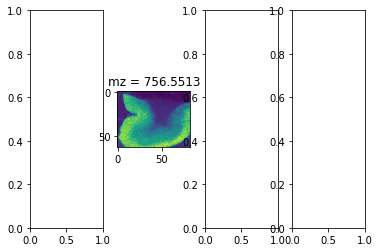

In [7]:
fig, axs = plt.subplots(1,4)
mz = 756.5513
img = M_raw.get_2D(M_raw.massvec(mz))
axs.flat[1].imshow(img)
axs.flat[1].set_title('mz = 756.5513')
plt.show()

### now, add other binnedMALDI functions

### add metaspace class, make mz list and then try selected including mask_on